<a href="https://colab.research.google.com/github/Shaielyfs/SensoriamentoRemoto/blob/main/SR_composicao_histograma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dados de sensoriamento remoto**

In [1]:
#instalar bibliotecas
!pip install rasterio -q
!pip install spectral -q
!pip install earthpy -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.0/249.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 31.0 MB/s eta 0:00:00


In [10]:
#importar bibliotecas
import zipfile
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

from spectral import imshow
import earthpy.plot as ep
import rasterio
from rasterio.mask import mask
from scipy.ndimage import median_filter, sobel, gaussian_filter, laplace, grey_dilation
from scipy.signal import convolve2d

In [11]:
#descompactar imagem
with zipfile.ZipFile('/content/drive/MyDrive/sensoriamento_remoto/IMAGEM.zip', 'r') as zip_ref:
  zip_ref.extractall('imagem')

with zipfile.ZipFile('/content/drive/MyDrive/analise_geoespacial_part2/PB_Municipios_2022.zip', 'r') as zip_ref:
  zip_ref.extractall('PB_Municipios')


In [12]:
#Ler dados shape
municipios = gpd.read_file('/content/PB_Municipios/PB_Municipios_2022.shp')

#selecionar municipio
municipio_especifico = municipios[municipios['NM_MUN'] == 'João Pessoa']


In [13]:
#abrir imagem Landsat
with rasterio.open('/content/imagem/LC09_L2SP_214065_20240108_20240113_02_T1_SR.tif') as src:
  b1 = src.read(1)
  b2 = src.read(2)
  b3 = src.read(3)
  b4 = src.read(4)
  b5 = src.read(5)
  b6 = src.read(6)

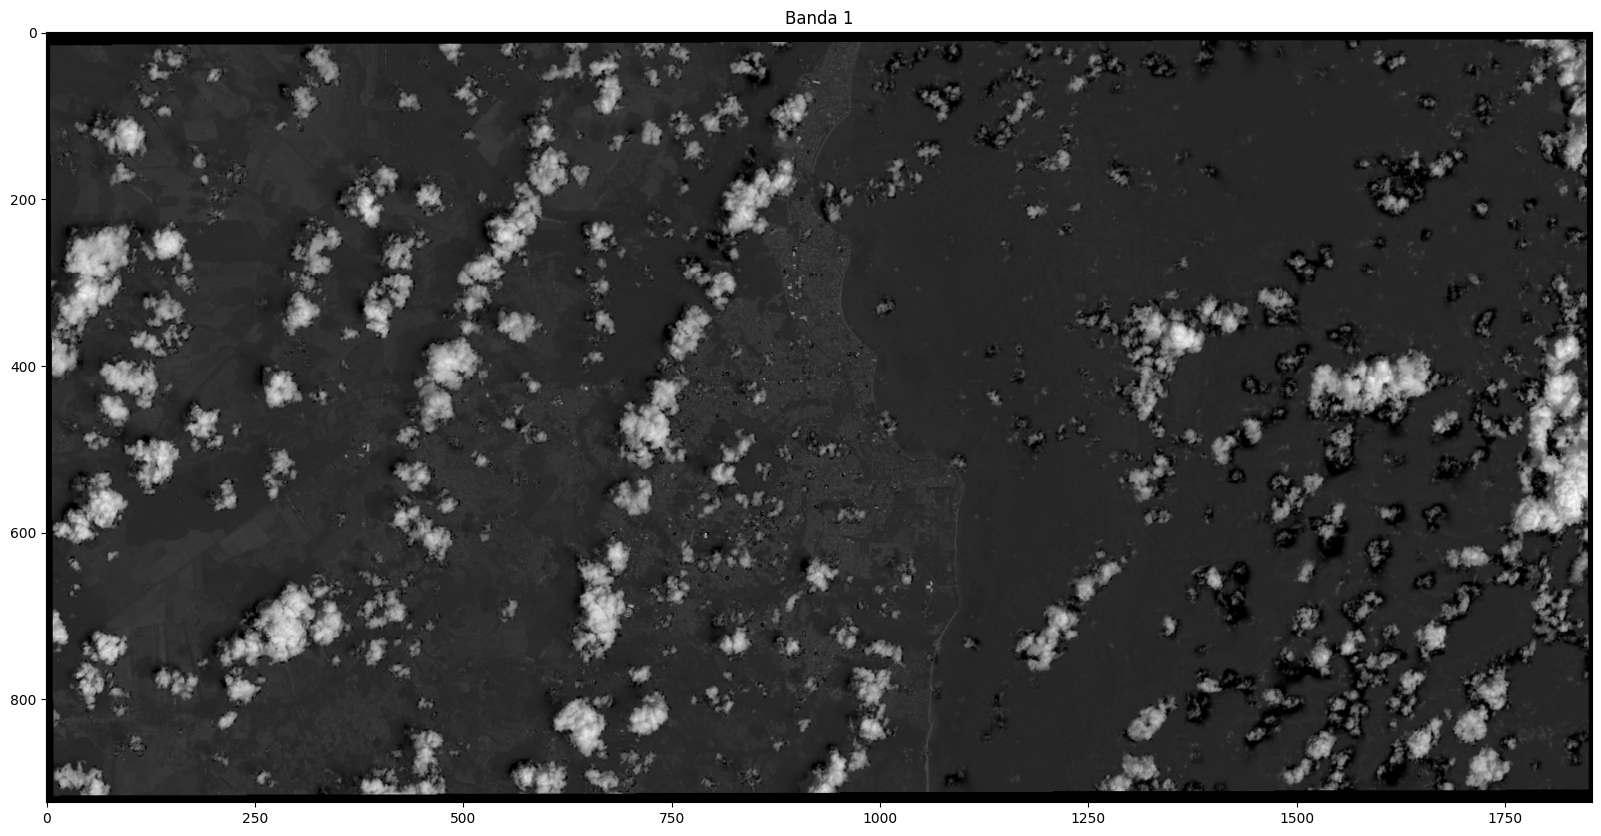

In [16]:
#exibir a composicao RGB
plt.figure(figsize=(20,10))
plt.imshow(b1, cmap='gray')
plt.title('Banda 1')
plt.show()

**Composição de bandas**

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(6885.0), np.float64(32158.0)]
    G: [np.float64(7238.0), np.float64(31659.0)]
    B: [np.float64(6349.0), np.float64(32064.0)]

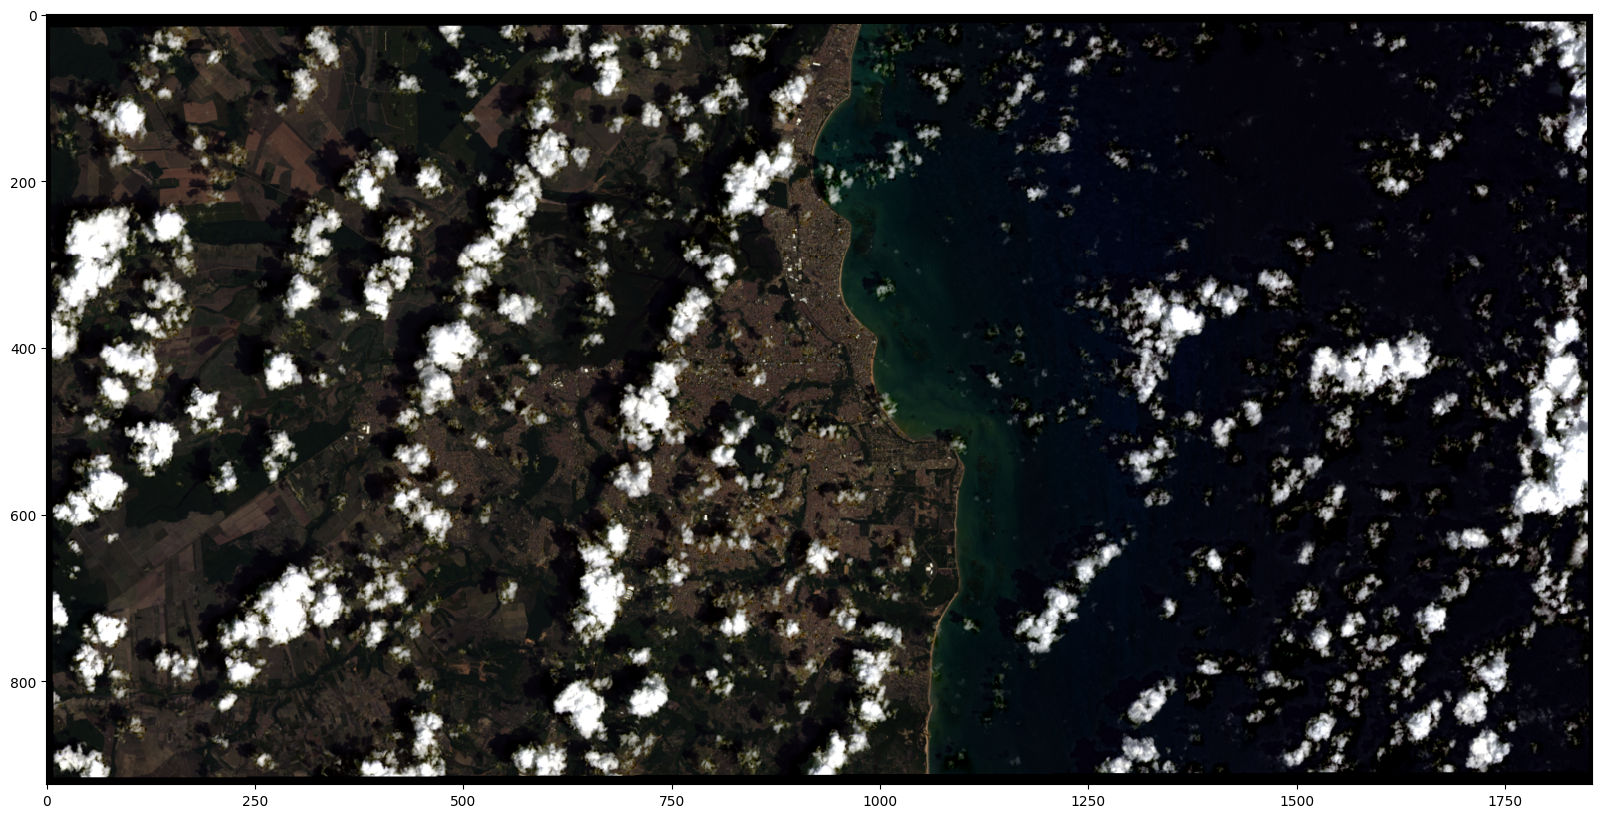

In [20]:
#compondo imagem
image = np.stack((b4, b3, b2), axis=-1) #avisa que utilizara todas as linhas

#exibir imagem
imshow(image, stretch=(0.09, 0.98), figsize=(20,10)) #histograma e tamanho

**Composição falsa cor**

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [np.float64(7157.0), np.float64(34043.0)]
    G: [np.float64(7238.0), np.float64(31659.0)]
    B: [np.float64(6349.0), np.float64(32064.0)]

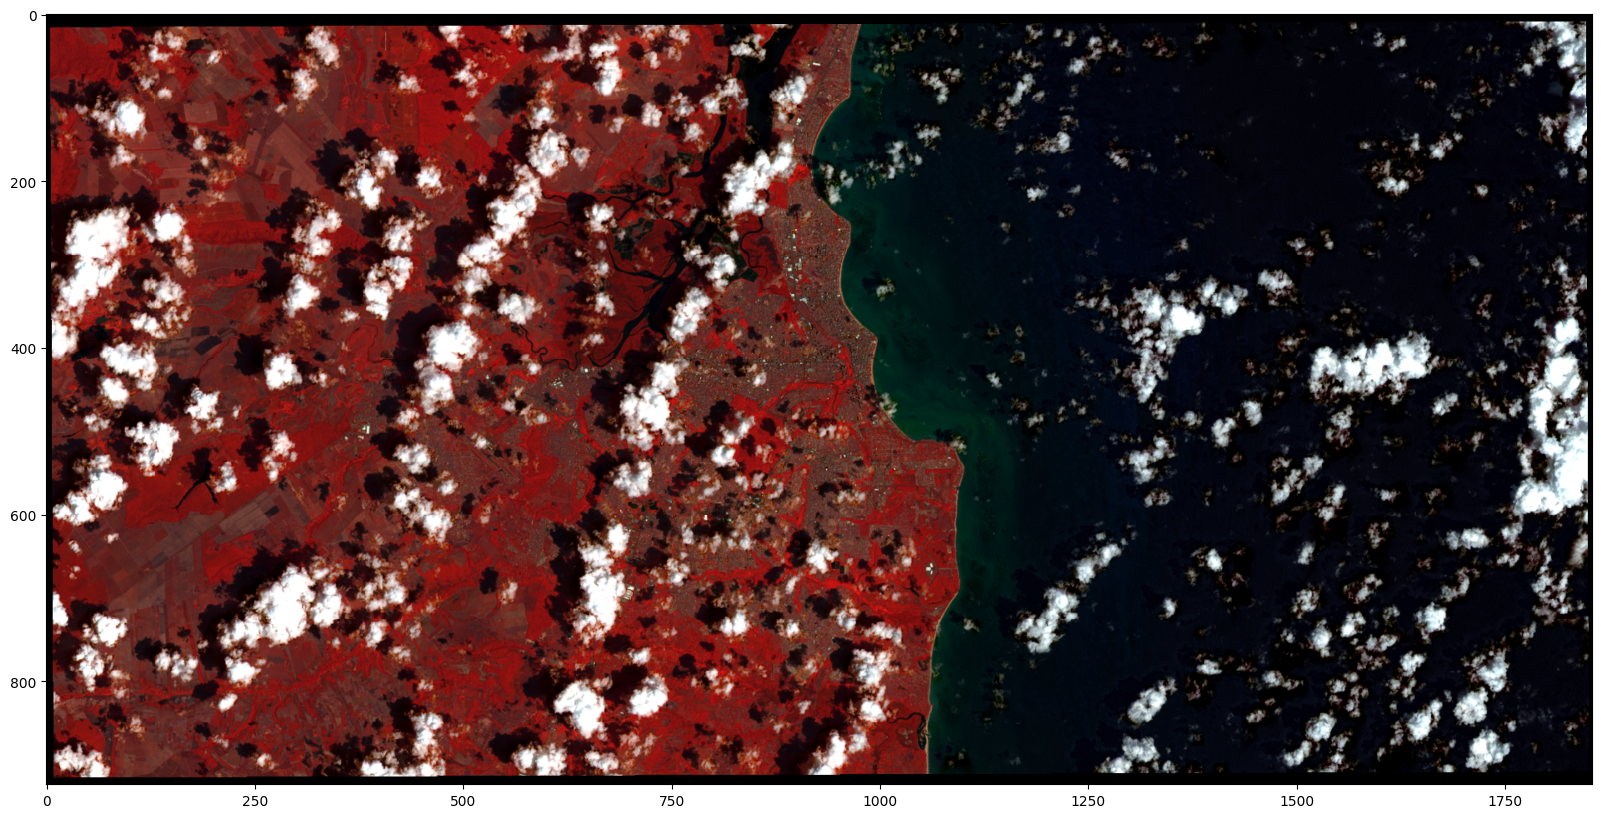

In [23]:
image_falsacor = np.stack((b5, b3, b2), axis=-1)
imshow(image_falsacor, stretch=(0.09,0.98), figsize=(20,10))